In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('global_superstore_data_numeric.csv')

# Handle Missing Values
# Fill missing values with the mean for numeric columns
numeric_data = data.select_dtypes(include=[np.number])
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

data.dropna(axis=0, inplace=True)  # Drop rows with missing values
data.dropna(axis=1, inplace=True)  # Drop columns with missing values

#  Remove Duplicates
data.drop_duplicates(inplace=True)

# Calculate z-scores
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))

# Define threshold for outliers (e.g., 3 standard deviations)
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]

# Save the cleaned dataset (optional)
data.to_csv('cleaned_dataset.csv', index=False)

# Print summary of cleaned data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      50 non-null     object 
 1   Year                         50 non-null     int64  
 2   Product Category             50 non-null     object 
 3   Product Sub-category         50 non-null     object 
 4   Sales Revenue                50 non-null     int64  
 5   Profit                       50 non-null     int64  
 6   Discount (%)                 50 non-null     float64
 7   Customer Return Rate (%)     50 non-null     float64
 8   Repeat Customers (%)         50 non-null     float64
 9   Customer Satisfaction Score  50 non-null     int64  
 10  Shipping Cost                50 non-null     float64
 11  Shipping Latency (Days)      50 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 4.8+ KB
None


In [2]:
print("Mean of each column:")
print(data[numeric_data.columns].mean(), "\n")  # Mean

print("Median of each column:")
print(data[numeric_data.columns].median(), "\n")  # Median

print("Standard Deviation of each column:")
print(data[numeric_data.columns].std(), "\n")  # Standard Deviation

print("Variance of each column:")
print(data[numeric_data.columns].var(), "\n")  # Variance

# 2. Correlations Between Variables
print("Correlation matrix:")
correlation_matrix = data[numeric_data.columns].corr()  # Compute correlations
print(correlation_matrix)

Mean of each column:
Year                             2015.8400
Sales Revenue                  279972.2800
Profit                          44593.6800
Discount (%)                       18.4048
Customer Return Rate (%)           11.0422
Repeat Customers (%)               27.4364
Customer Satisfaction Score         5.1600
Shipping Cost                      60.4526
Shipping Latency (Days)             5.1800
dtype: float64 

Median of each column:
Year                             2016.000
Sales Revenue                  280224.000
Profit                          42932.000
Discount (%)                       19.065
Customer Return Rate (%)           11.570
Repeat Customers (%)               27.455
Customer Satisfaction Score         4.000
Shipping Cost                      60.200
Shipping Latency (Days)             5.000
dtype: float64 

Standard Deviation of each column:
Year                                1.447870
Sales Revenue                  128908.868276
Profit                          

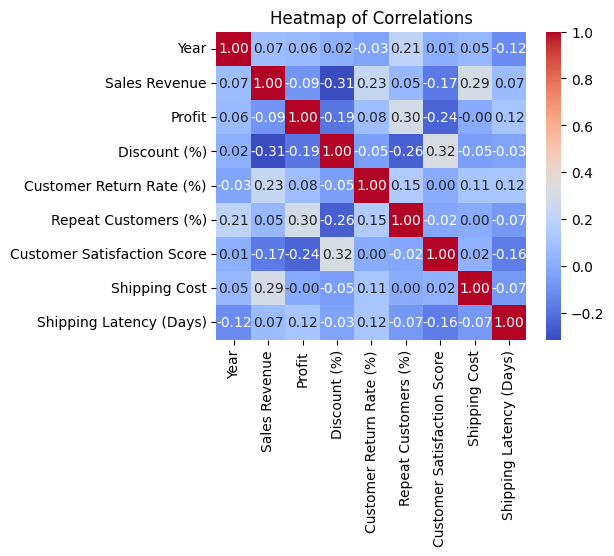

In [3]:
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

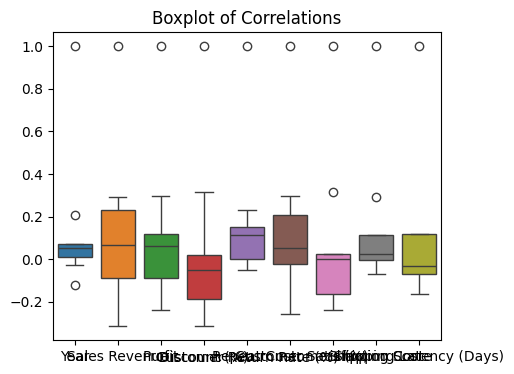

In [4]:
plt.figure(figsize=(5,4))
sns.boxplot(correlation_matrix)
plt.title("Boxplot of Correlations")
plt.show()

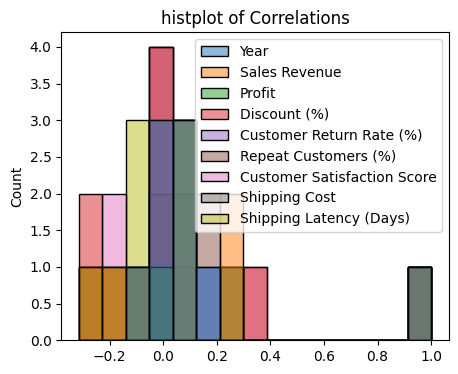

In [5]:
plt.figure(figsize=(5,4))
sns.histplot(correlation_matrix)
plt.title("histplot of Correlations")
plt.show()

In [6]:
import pandas as pd

# Load the dataset with appropriate encoding
file_path = 'Sample_EDA_Dataset.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Step 1: Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Step 2: Fill missing values in 'Postal Code' with the median value
data_cleaned['Postal Code'] = data_cleaned['Postal Code'].fillna(data_cleaned['Postal Code'].median())

# Step 3: Convert 'Order Date' to datetime format
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'], format='%d-%m-%Y', errors='coerce')

# Display the first few rows to verify the changes
print(data_cleaned.info())
#print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

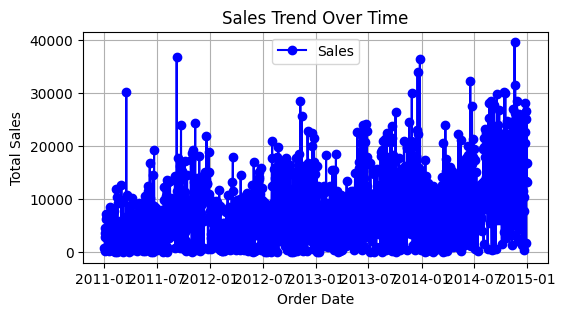

In [7]:
import matplotlib.pyplot as plt

# Aggregate sales by 'Order Date'
sales_trend = data_cleaned.groupby('Order Date')['Sales'].sum()

# Plot the time series graph
plt.figure(figsize=(6,3))
plt.plot(sales_trend, marker='o', linestyle='-', color='b', label='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


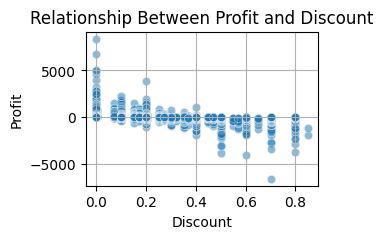

In [8]:

import seaborn as sns

# Scatter plot for Profit vs Discount
plt.figure(figsize=(3,2))
sns.scatterplot(data=data_cleaned, x='Discount', y='Profit', alpha=0.5)
plt.title('Relationship Between Profit and Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()


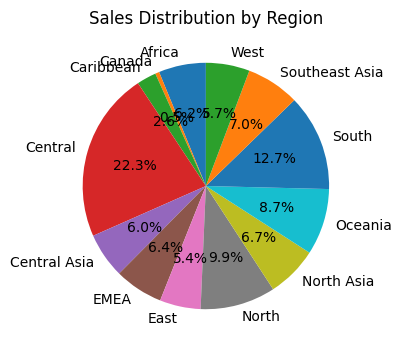

In [9]:
# Pie chart for Sales distribution by Region
region_sales = data_cleaned.groupby('Region')['Sales'].sum()
region_sales.plot.pie(autopct='%1.1f%%', figsize=(4,4), startangle=90, labels=region_sales.index)
plt.title('Sales Distribution by Region')
plt.ylabel('')  # Remove default ylabel for clarity
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select Features and Target Variable
X = data_cleaned[['Profit', 'Discount']]  # Features
y = data_cleaned['Sales']  # Target variable

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Model Coefficients: [  1.48311109 189.26580607]
Model Intercept: 176.0213437046341
Mean Squared Error: 187787.80150462053
R-squared Score: 0.16090406163840765
